In [1]:
# import libraries needed for this notbook 
import pandas as pd 
import numpy as np 
from keras.models import load_model
import json 
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load dict_butterfly_index from eksternal file and model
with open('dict_butterfly_index.json', 'r') as file_1:
  dict_butterfly_index = json.load(file_1)

model = load_model("model_after.h5")

In [3]:
def prediction_one_image(file,model):
  '''
  This function is used to predict species image with 

  parameter description 
  ============================
  file = filename/file path image 
  model = model used to clasify species from image 

  example usage 
  ========================
  '''
  img = tf.keras.utils.load_img(file, target_size=(224, 224))
  x = tf.keras.utils.img_to_array(img)/255
  plt.imshow(img)

  x = np.expand_dims(x, axis=0)
  images = np.vstack((x,x))
  classes = model.predict(images, batch_size=10)
  idx = np.argmax(classes[0])
  print(f"This Butterfly species is {dict_butterfly_index[str(idx)]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
This Butterfly species is CRIMSON PATCH


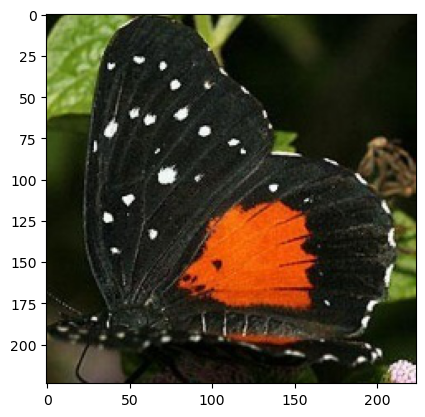

In [4]:
# Do predict with image that dont use for train , testing, and evaluation
filename_image = 'test/Image_2.jpg'
prediction_one_image(filename_image,model)